#VAR 모형

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as VAR
import statsmodels.api as sm
import matplotlib.dates as mdates

mdata = sm.datasets.macrodata.load_pandas().data
df = mdata.copy()

In [ ]:
mdata = sm.datasets.macrodata.load_pandas().data
df = mdata.copy()

In [ ]:
dates = mdata[["year","quarter"]]

In [ ]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
print(quarterly)

0      1959Q1
1      1959Q2
2      1959Q3
3      1959Q4
4      1960Q1
        ...  
198    2008Q3
199    2008Q4
200    2009Q1
201    2009Q2
202    2009Q3
Length: 203, dtype: object


In [ ]:
mdata_index=mdata.set_index(quatery)
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)


In [ ]:
index = pd.PeriodIndex(df["year"].astype(int),
                       df["quarter"].astype(int),
                       freq="Q-DEC")


PeriodIndex(['1959Q1', '1959Q1', '1959Q1', '1959Q1', '1960Q1', '1960Q1',
             '1960Q1', '1960Q1', '1961Q1', '1961Q1',
             ...
             '2007Q1', '2007Q1', '2007Q1', '2008Q1', '2008Q1', '2008Q1',
             '2008Q1', '2009Q1', '2009Q1', '2009Q1'],
            dtype='period[Q-DEC]', name='year', length=203)

In [ ]:
index = pd.PeriodIndex(mdata["year"],
                       mdata[""]
                       freq="Q-DEC")
index

KeyError: 'quater'

In [ ]:
# data select
# 'realgdp','realcons','realinv']
df1= mdata_index[['realgdp','realcons','realinv']]

          realgdp  realcons   realinv
1959Q1   2710.349    1707.4   286.898
1959Q2   2778.801    1733.7   310.859
1959Q3   2775.488    1751.8   289.226
1959Q4   2785.204    1753.7   299.356
1960Q1   2847.699    1770.5   331.722
...           ...       ...       ...
2008Q3  13324.600    9267.7  1990.693
2008Q4  13141.920    9195.3  1857.661
2009Q1  12925.410    9209.2  1558.494
2009Q2  12901.504    9189.0  1456.678
2009Q3  12990.341    9256.0  1486.398

[203 rows x 3 columns]


<Axes: >

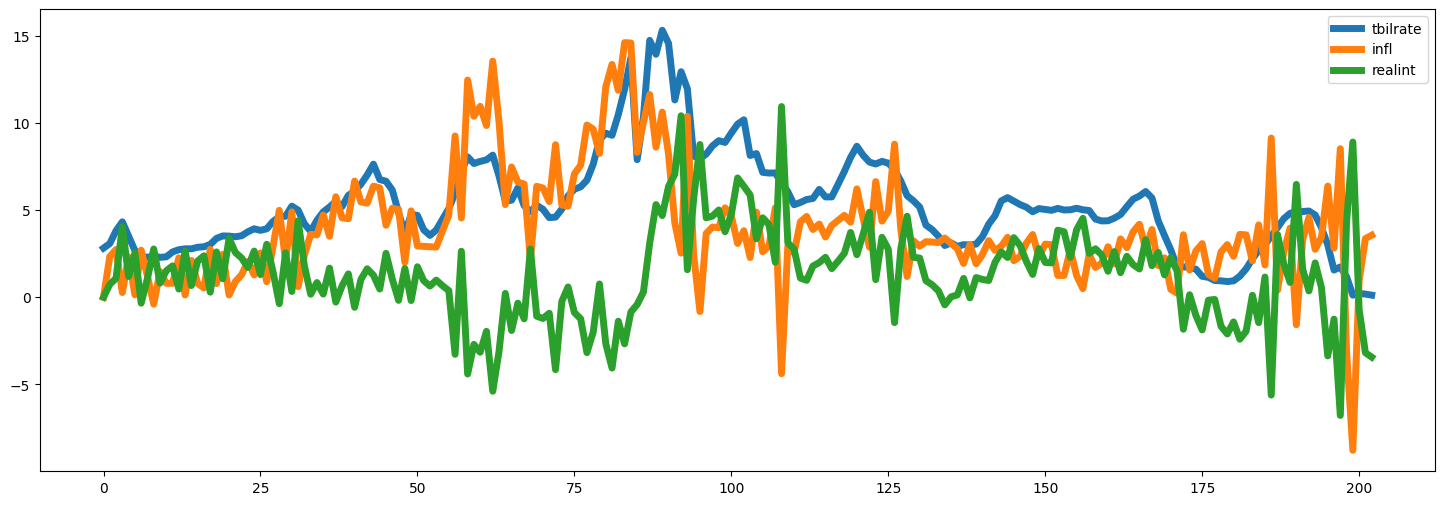

In [ ]:
mdata[['tbilrate', 'infl',	'realint']].plot(figsize=(18, 6), linewidth=5)

In [ ]:
mdata = mdata[['realgdp','realcons','realinv']] # select 3 series
mdata.index = pd.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()

In [ ]:
import matplotlib.pyplot as plt
print(data)

             realgdp  realcons   realinv
1959-06-30  0.024942  0.015286  0.080213
1959-09-30 -0.001193  0.010386 -0.072131
1959-12-31  0.003495  0.001084  0.034425
1960-03-31  0.022190  0.009534  0.102664
1960-06-30 -0.004685  0.012572 -0.106694
...              ...       ...       ...
2008-09-30 -0.006781 -0.008948 -0.017836
2008-12-31 -0.013805 -0.007843 -0.069165
2009-03-31 -0.016612  0.001511 -0.175598
2009-06-30 -0.001851 -0.002196 -0.067561
2009-09-30  0.006862  0.007265  0.020197

[202 rows x 3 columns]


<Axes: >

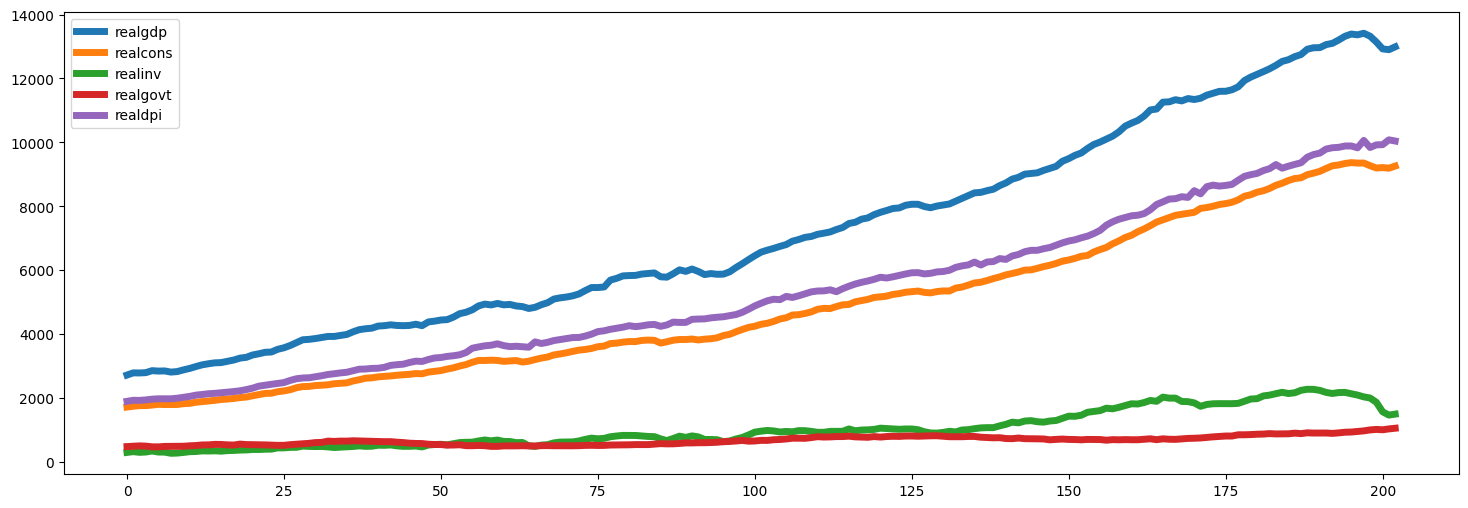

In [ ]:
import matplotlib.pyplot as plt
df[['realgdp',	'realcons',	'realinv',	'realgovt',	'realdpi']].plot(figsize=(18, 6), linewidth=5)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

0
1
2
3


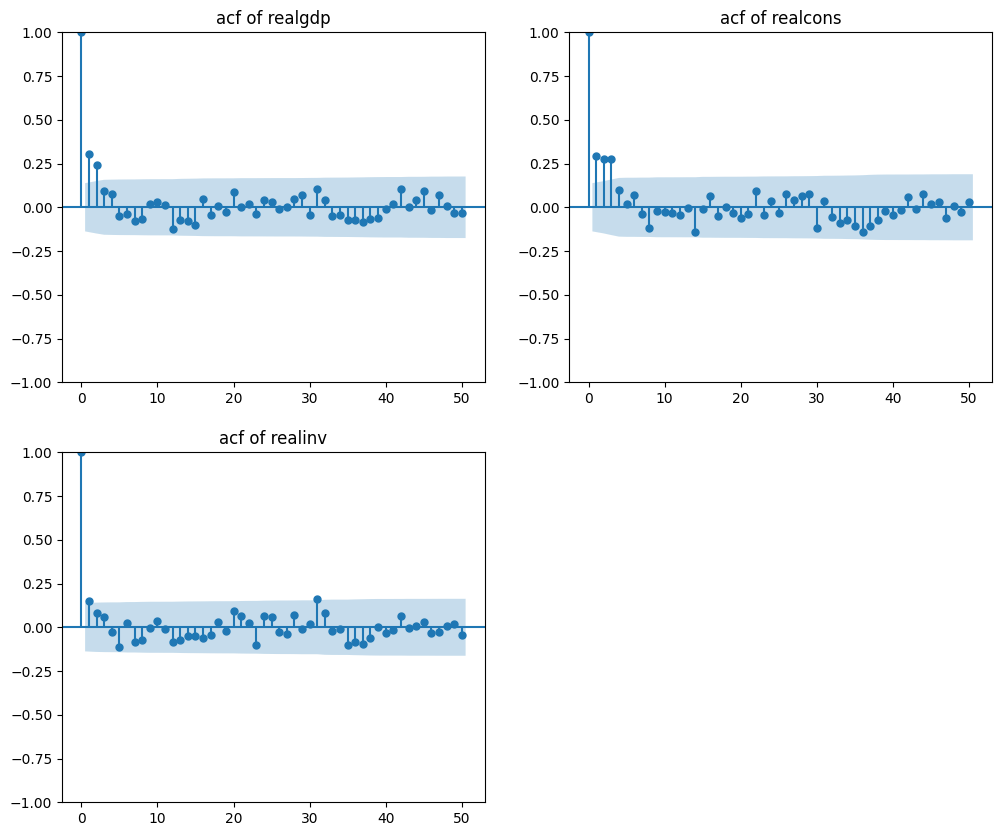

In [ ]:
row=2
col=2
fig, axs = plt.subplots(row,col, figsize=(12,10))

for i in range(row):
  for j in range(col):
    index = i*col+j
    print(index)

    if index < 3:
      plot_acf(data.iloc[:,index], ax = axs[i,j], lags=50)
      axs[i,j].set_title(f"acf of {data.columns[index]}")
    else:
      axs[i,j].axis("off")

0
1
2
3


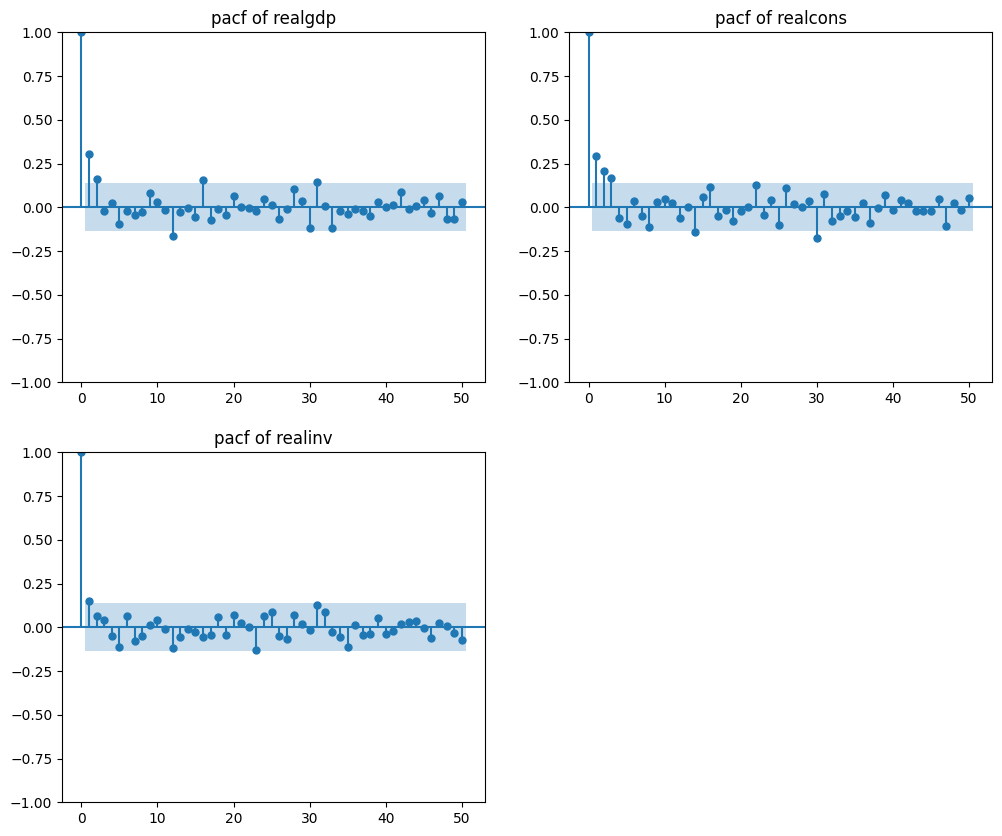

In [ ]:
row=2
col=2
fig, axs = plt.subplots(row,col, figsize=(12,10))

for i in range(row):
  for j in range(col):
    index = i*col+j
    print(index)

    if index < 3:
      plot_pacf(data.iloc[:,index], ax = axs[i,j], lags=50)
      axs[i,j].set_title(f"pacf of {data.columns[index]}")
    else:
      axs[i,j].axis("off") # fig.delaxis(axs[i,j])

In [ ]:
# adf-test:
from statsmodels.tsa.stattools import adfuller

def adf_test(ts):
  result = adfuller(ts)
  print(f"statistic:{result[0]}")
  print(f"p-value:{result[1]}")
  print(f"ndiff:{result[2]}")


In [ ]:
for i in data.columns:
  adf_test(data[i])
  print("=============\n")

statistic:-6.972871347216282
p-value:8.575095844896131e-10
ndiff:1

statistic:-4.9919710954018415
p-value:2.3019647890448445e-05
ndiff:2

statistic:-12.218963138550665
p-value:1.1186580162368948e-22
ndiff:0



In [ ]:
train_data = data[0:-5]
val_data = data[-5:]

In [ ]:
train_data

,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694
...,...,...,...
2007-06-30,0.007913,0.002845,0.013787
2007-09-30,0.008832,0.004735,0.001976
2007-12-31,0.005252,0.002995,-0.020078
2008-03-31,-0.001823,-0.001496,-0.019276


In [ ]:
val_data

,realgdp,realcons,realinv
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561
2009-09-30,0.006862,0.007265,0.020197


<Axes: >

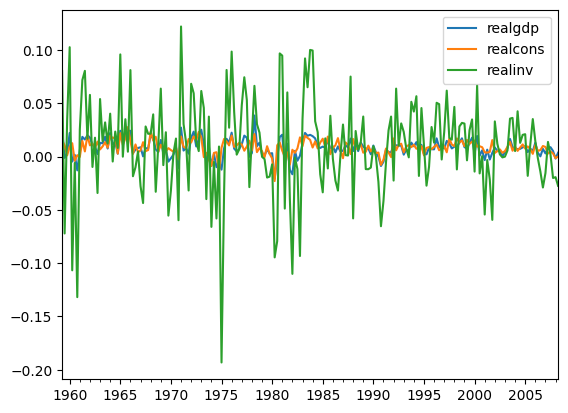

In [ ]:
train_data.plot()

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
model_var = VAR(endog = train_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [ ]:
res=model_var.select_order(6)
res.summary()

,AIC,BIC,FPE,HQIC
0,-27.82,-27.77,8.281e-13,-27.80
1,-28.10*,-27.89*,6.277e-13*,-28.01*
2,-28.07,-27.71,6.449e-13,-27.93
3,-28.07,-27.55,6.476e-13,-27.86
4,-28.07,-27.41,6.439e-13,-27.80
5,-28.05,-27.24,6.554e-13,-27.72
6,-28.01,-27.04,6.826e-13,-27.62


In [ ]:
model_fit=model_var.fit(maxlags=3, ic="aic")

In [ ]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Jul, 2024
Time:                     16:52:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    20.2617
Nobs:                     194.000    HQIC:                   19.9610
Log likelihood:          -2712.19    FPE:                3.80353e+08
AIC:                      19.7563    Det(Omega_mle):     3.27116e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              16.223153         6.941477            2.337           0.019
L1.realgdp         -0.437805         0.152033           -2.880           0.004
L1.realcons         1.107148         0.189401            5.846    

In [ ]:
lag_order = model_fit.k_ar
print(lag_order)

3


In [ ]:
model_fit.forecast(train_data.values[-lag_order:], steps=5)

array([[-30.23875325, -14.3562085 , -49.85100108],
       [ -6.12862473, -16.35471583, -29.48797642],
       [-15.62898389, -12.9967046 , -37.17847539],
       [ -9.71131969,  -7.48989472, -25.33001976],
       [ -3.46840237,  -5.45626179, -18.42020209]])

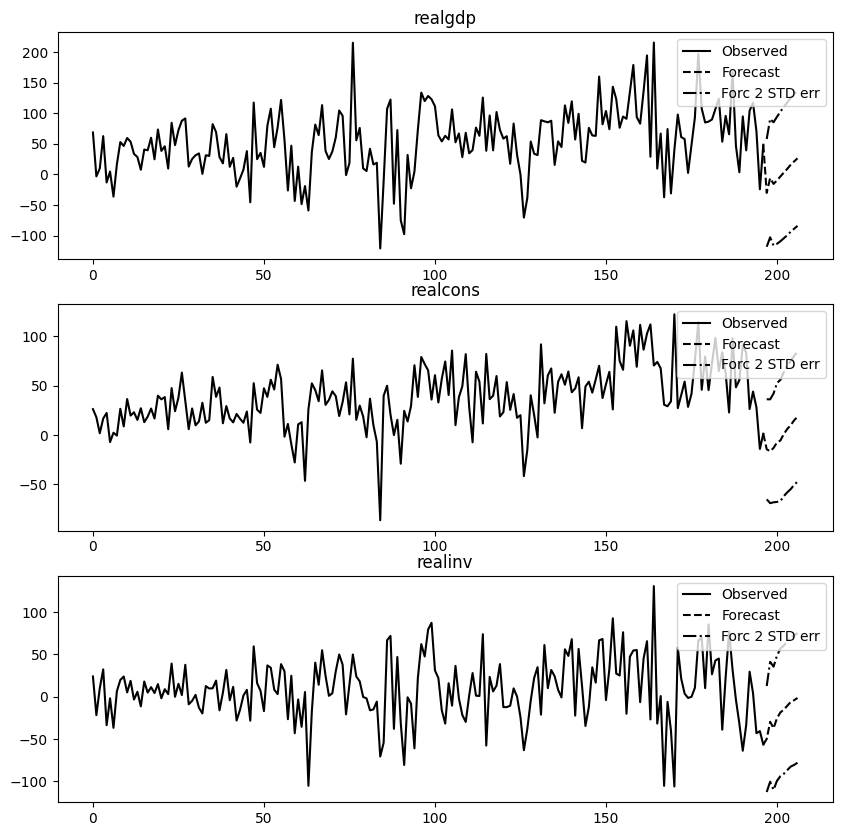

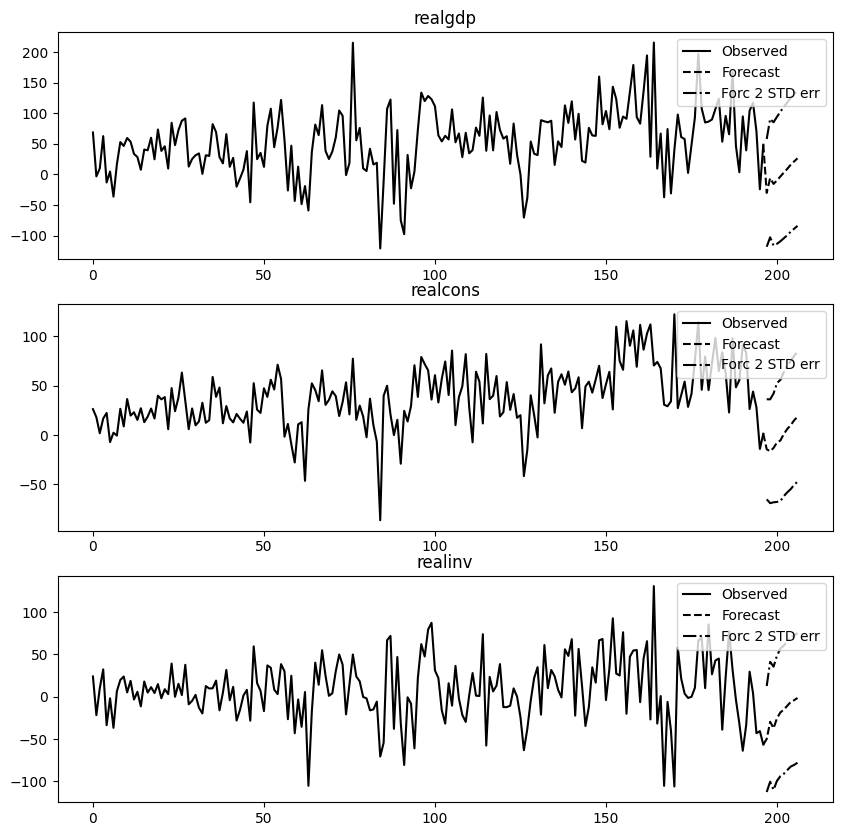

In [ ]:
model_fit.plot_forecast(10)

In [ ]:
pred = model_fit.forecast(train_data.values[-lag_order:], steps=5)
pred = pd.DataFrame(pred, index=val_data.index, columns=val_data.columns + '_pred')
pred

,realgdp_pred,realcons_pred,realinv_pred
2008Q3,-30.238753,-14.356208,-49.851001
2008Q4,-6.128625,-16.354716,-29.487976
2009Q1,-15.628984,-12.996705,-37.178475
2009Q2,-9.711320,-7.489895,-25.330020
2009Q3,-3.468402,-5.456262,-18.420202


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Calculate forecast bias
forecast_errors = [val_data['realgdp'][i]- pred['realgdp_pred'][i] for i in range(len(val_data['realgdp']))]
bias = sum(forecast_errors) * 1.0/len(val_data['realgdp'])
print('Bias: %f' % bias)

#Calculate mean absolute error
mae = mean_absolute_error(val_data['realgdp'],pred['realgdp_pred'])
print('MAE: %f' % mae)

#Calculate mean squared error and root mean squared error
mse = mean_squared_error(val_data['realgdp'], pred['realgdp_pred'])
print('MSE: %f' % mse)

rmse = np.sqrt(mse)
print('RMSE: %f' % rmse)

Bias: -71.949783
MAE: 108.871944
MSE: 16779.359829
RMSE: 129.535168


# VECM

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as VAR
import statsmodels.api as sm
import matplotlib.dates as mdates

mdata = sm.datasets.macrodata.load_pandas().data
df = mdata.copy()

In [157]:
year = df["year"].astype(int)
quater=df["quarter"].astype(int)

year_quater =year.astype(str)+"Q"+quater.astype(str)

In [158]:
data = mdata.set_index(year_quater)

In [159]:
df = data[['realgdp','realcons','realinv']]

<Axes: >

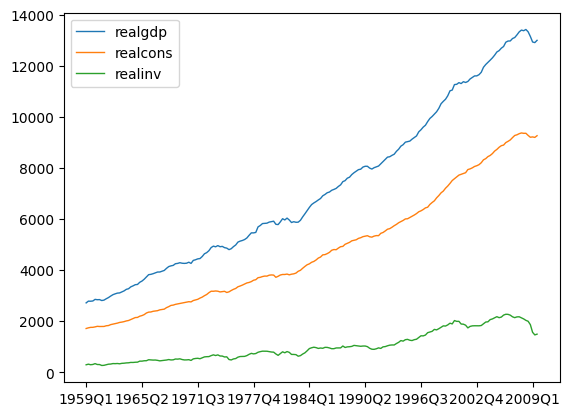

In [160]:
df.plot(lw=1)


In [161]:
data=df.diff().dropna()
train_data, test_data = df[0:-5], df[-5:]

In [162]:
train_data

,realgdp,realcons,realinv
1959Q1,2710.349,1707.4,286.898
1959Q2,2778.801,1733.7,310.859
1959Q3,2775.488,1751.8,289.226
1959Q4,2785.204,1753.7,299.356
1960Q1,2847.699,1770.5,331.722
...,...,...,...
2007Q2,13203.977,9291.5,2162.214
2007Q3,13321.109,9335.6,2166.491
2007Q4,13391.249,9363.6,2123.426
2008Q1,13366.865,9349.6,2082.886


In [221]:
from statsmodels.tsa.vector_ar.vecm import VECM

In [184]:
## Statistical Test for Cointegration (VECM 공적분 테스트)
## 귀무가설 : 공적분 특성없다, 대립가설 : 공적분 특성 있다
train_data
test_trace=vecm.select_coint_rank(train_data,  # 검증 데이터
                                  det_order = 1,  # 설명 데이터에 포함된 결정론적 구성요소
                                  k_ar_diff = 1, # 차분 지연항의 수
                                  method="trace",  # 공적분 검정의 방법
                                  signif = 0.01) # 유의수준 (0.05도 있다.)


s= coint_johansen(train_data, det_order=1, k_ar_diff=1)

print(s.lr1)
print(s.cvt)

print(s.cvt[0][0])
print(s.cvt[1][0])
print(s.cvt[2][0])


print(s.cvt[0][1])
print(s.cvt[1][1])
print(s.cvt[2][1])

print(s.cvt[0][2])
print(s.cvt[1][2])
print(s.cvt[2][2])


[30.01194736  9.6573518   2.04434284]
[[32.0645 35.0116 41.0815]
 [16.1619 18.3985 23.1485]
 [ 2.7055  3.8415  6.6349]]
32.0645
16.1619
2.7055
35.0116
18.3985
3.8415
41.0815
23.1485
6.6349


```
 r0    r1    r2
statistic    30.011947    9.657352    2.044343
CI[10%]    32.064500    16.161900    2.705500
CI[5%]    35.011600    18.398500    3.841500
CI[1%]    41.081500    23.148500    6.634900
```

In [194]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen, VECM
# result = coint_johansen(df, det_order=1, k_ar_diff=1)
#print(result.lr1)  # Trace statistic
# print(result.cvt)  # CI

test_df = pd.DataFrame()


class JohansenTest:
    def __init__(self, data):
        self.data = data

    # DataFrame 생성
    def stat_make_df(self):
        global test_df
        result = coint_johansen(self.data, det_order=1, k_ar_diff=1)

        # 결과를 DataFrame에 저장
        test_df = pd.DataFrame()

        for i in range(len(result.lr1)):
            test_df[i] = [result.lr1[i],
                          result.cvt[0][i],
                          result.cvt[1][i],
                          result.cvt[2][i]
                          ]

        # 행(index)와 열(columns) 이름 변경
        test_df.rename(index={0: "statistic",
                              1: "CI[10%]",
                              2: "CI[5%]",
                              3: "CI[1%]"}, inplace=True)
        test_df.columns = ["r0", "r1", "r2"]

        return test_df

    # 검증
    def stat_test(self):
        df = self.stat_make_df()

        for col in range(0, len(df.columns)): # ,1,2,3
           for row in range(1, len(df.index)): # 0,1,2
              stat = df.iloc[0, col].round(3)
              ci = df.iloc[row, col].round(3)
              if stat > ci:
                print(f"통계량 {stat} / CI값이 {ci}이므로 r{col}에서 귀무가설을 기각합니다.")
              else:
                continue

In [195]:
johansen_test_instance = JohansenTest(train_data)
johansen_test_instance.stat_test()

통계량 30.012 / CI값이 16.162이므로 r0에서 귀무가설을 기각합니다.
통계량 30.012 / CI값이 2.706이므로 r0에서 귀무가설을 기각합니다.
통계량 9.657 / CI값이 3.842이므로 r1에서 귀무가설을 기각합니다.


In [ ]:
# 모델링
# 차분지연항의 수란? : AIC(BIC) 또는 VAR를 추적하여 생성

In [228]:
#
from statsmodels.tsa.api import VAR
var_model = VAR(train_data)

selected_order = var_model.select_order(maxlags=15)
selected_order.summary() # 4로 추정

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,34.08,34.13,6.315e+14,34.10
1,20.29,20.50,6.506e+08,20.38
2,19.81,20.18*,4.015e+08,19.96*
3,19.79,20.32,3.934e+08,20.00
4,19.78*,20.46,3.880e+08*,20.05
5,19.81,20.65,4.002e+08,20.15
6,19.86,20.86,4.239e+08,20.27
7,19.90,21.06,4.411e+08,20.37
8,19.91,21.23,4.474e+08,20.45
9,19.94,21.41,4.609e+08,20.54


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


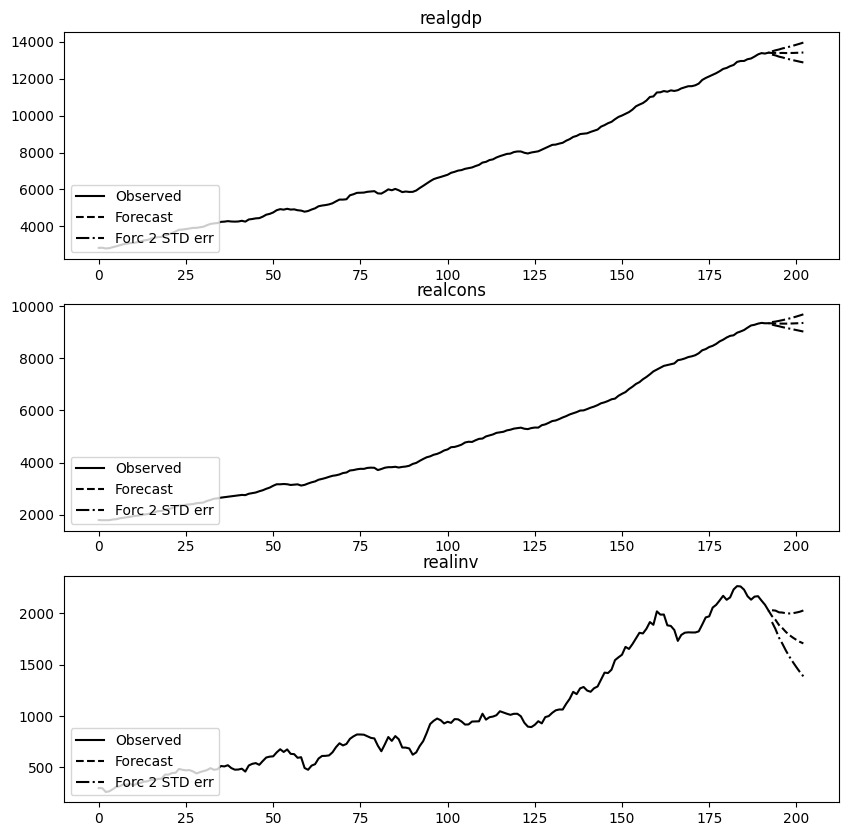

In [261]:
vecm_model = vecm.VECM(endog = train_data,
                 k_ar_diff =4, coint_rank = 1, deterministic = 'ci')
vecm_model_fit = vecm_model.fit()
vecm_model_fit.summary()
# 해당 그래프는 관계성을 확인해 주는 지표로 사용됨.

# 에측 그래프

vecm_model_fit.plot_forecast(10)

In [236]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson 통계량 - 잔차
residuals = vecm_model_fit.resid
dw_stat = durbin_watson(residuals)
print('Durbin-Watson statistic:', dw_stat) # 잔차의 독립성을 확인하는 여부
# 통계량 2에 가까우면 좋은 값 / 0,4에 가까워버리면 잔차의 가정은 완전 위

Durbin-Watson statistic: [1.98594767 2.00451482 1.96773495]


```
	r0	r1	r2
statistic	30.011947	9.657352	2.044343
CI[10%]	32.064500	16.161900	2.705500
CI[5%]	35.011600	18.398500	3.841500
CI[1%]	41.081500	23.148500	6.634900


test_trace.summary()

Johansen cointegration test using trace test statistic with 1% significance level
r_0	r_1	test statistic	critical value
0	3	30.01	41.08

- **Test Statistic (30.01)**이 **Critical Value (41.08)**보다 작습니다.

- 이는 0개 이상의 공적분 벡터가 존재한다는 귀무가설(H0)을 기각할 수 없음을 의미합니다.
```

In [243]:
lag_order = vecm_model_fit.k_ar
print(lag_order)

forecast = vecm_model_fit.predict(steps=5)

5


In [252]:
result = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)
result

,realgdp,realcons,realinv
2008Q3,13400.061286,9346.898261,1972.096900
2008Q4,13405.234709,9339.245259,1936.399861
2009Q1,13393.665112,9338.512474,1886.182789
2009Q2,13401.562989,9335.796542,1854.898054
2009Q3,13393.823255,9335.771998,1818.065051


In [253]:
# 예측 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error


for i in result.columns:
  #mae = mean_absolute_error(test_data[i], result[i])
  mse = mean_squared_error(test_data[i], result[i])
  rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 229.63384939018025
MSE: 76501.56193076391
RMSE: 276.58915729067166


/content/drive/MyDrive/Colab_Notebooks/colab_for_time_series


/bin/bash: line 1: ZZongSeung/VAR-VECM: No such file or directory
